Enter the question number [1a,1b,1c,1d,1e,1f]:1a
		EULERS METHOD		


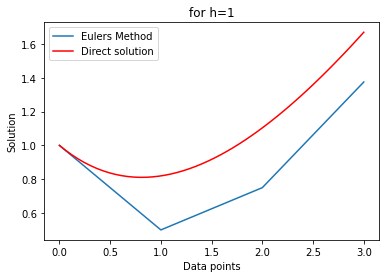

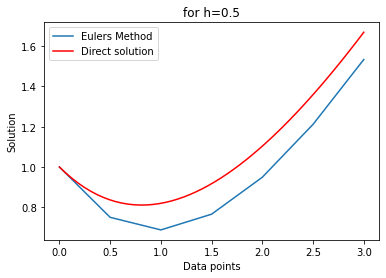

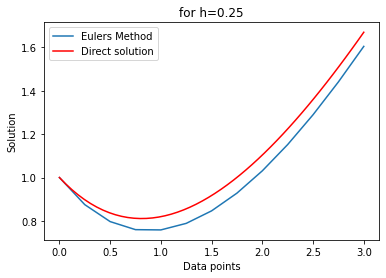

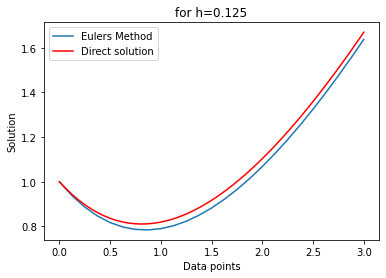

In [1]:
import numpy as np
import scipy as sp
import sympy as sym
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
def ivp(y,x):
  dydx=(x-y)/2
  return dydx
#x data set for given h
def x_p(x0,h):
    x=[x0]
    a=0
    while a<3:
      a=a+h
      x.append(a)
    return x
#Exact solution
def sol():
  a=sym.symbols('a')
  b=sym.Function('b')(a)
  dydx=b.diff(a)
  deq=Eq(dydx,(a-b)/2)
  sol=dsolve(deq)
  eq=sol.rhs.subs(a,0)-1
  const=solve([eq])
  solution=sol.subs(const)
  i=np.linspace(0,3)
  bs=[]
  for j in i:
    bi=solution.rhs.subs(a,j)
    bs.append(bi)
  plt.plot(i,bs,label='Direct solution',color='red')
  plt.xlabel('Data points')
  plt.ylabel('Solution')
  return bs
def Eulers(x0,y0,h):
   #number of iterations
  y=[y0]
  x=x_p(x0,h)
  for i in range(0,len(x)-1):
      y1=y[i]+(h*ivp(y[i],x[i]))
      y.append(y1)
  return y
def modified_Eulers(x0,y0,h):
  yp=Eulers(x0,y0,h)
  y=[y0]
  x=x_p(x0,h)
  for i in range(0,len(x)-1):
      y1=y[i]+((h/2)*(ivp(y[i],x[i]))+(ivp(yp[i+1],x[i])))
      y.append(y1)
  return y  
def y1(x,y):
  dydx=(x-y)/2
  return dydx
def y11(x,y):
  d2y=(1-y1(x,y))/2
  return d2y
def y111(x,y):
  d3y=-y11(x,y)/2
  return d3y
def y1111(x,y):
  d4y=-y111(x,y)/2
  return d4y
def taylors(x0,y0,h):
  y=[y0]
  x=x_p(x0,h)
  for i in range(0,len(x)-1):
      a=h*y1(x[i],y[i])
      b=(h**2 /2.0)*y11(x[i],y[i])
      c=(h**3 /6.0)*y111(x[i],y[i])
      d=(h**4 /24.0)*y1111(x[i],y[i])
      yp=y[i]+a+b+c+d
      y.append(yp)
  return y

def Runge_kutta(x0,y0,h):
  y=[y0]
  x=x_p(x0,h)
  for i in range(0,len(x)-1):
    k1=h*ivp(y[i],x[i])
    k2=h*ivp((y[i]+(k1/2)),(x[i]+(h/2)))
    k3=h*ivp((y[i]+(k2/2)),(x[i]+(h/2)))
    k4=h*ivp((y[i]+k3),(x[i]+h))
    yp=y[i]+((k1+(2*k2)+(2*k3)+k4)/6)
    y.append(yp)
  return y
def Adam_Bashforth(x0,y0,h):
    x=x_p(x0,h)
    N=len(x)
    y=[]
    ys=Runge_kutta(0,1,h) #Starter for y1,y2,y3
    for i in range(0,4):
      y.append(ys[i])
    for i in range(3,N-1):
      a=ivp(y[i],x[i])
      b=ivp(y[i-1],x[i-1])
      c=ivp(y[i-2],x[i-2])
      d=ivp(y[i-3],x[i-3])
      yp=y[i]+((h/24)*((55*a)-(59*b)+(37*c)-(9*d)))
      y.append(yp)
    return y
def Adams_moulton(h):
  x=x_p(0,h)
  N=len(x)
  y=[]
  yp=Adam_Bashforth(0,1,h)
  y=yp
  for i in range(2,N-1):
    a=ivp(yp[i+1],x[i+1])
    b=ivp(y[i],x[i])
    c=ivp(y[i-1],x[i-1])
    d=ivp(y[i-2],x[i-2])
    yc=y[i]+((h/24)*((9*a)+(19*b)-(5*c)+(d)))
    y[i+1]=yc
  return y
q=input('Enter the question number [1a,1b,1c,1d,1e,1f]:')
if q=='1a':
  print('\t\tEULERS METHOD\t\t')
  for h in [1,0.5,0.25,0.125]:
    y=Eulers(0,1,h)
    x=x_p(0,h)
    plt.title('for h={}'.format(h))
    plt.plot(x,y,label='Eulers Method')
    plt.xlabel('Data points')
    plt.ylabel('Solution')
    sol()
    plt.legend()
    plt.show()
elif q=='1b':
  print('\t\tMODIFIED EULERS METHOD\t\t')
  for h in [1,0.5,0.25,0.125]:
    y=modified_Eulers(0,1,h)
    x=x_p(0,h)
    plt.title('for h={}'.format(h))
    plt.plot(x,y,label='Modified Eulers Method')
    plt.xlabel('Data points')
    plt.ylabel('Solution')
    sol()
    plt.legend()
    plt.show()
elif q=='1c':
  print('\t\tTAYLORS METHOD\t\t')
  for h in [1,0.5,0.25,0.125]:
    y=taylors(0,1,h)
    x=x_p(0,h)
    plt.title('for h={}'.format(h))
    plt.plot(x,y,label='TAYLORS METHOD',color='black')
    plt.xlabel('Data points')
    plt.ylabel('Solution')
    sol()
    plt.legend()
    plt.show()
elif q=='1d':
  print('\t\tRUNGE-KUTTA METHOD\t\t')
  for h in [1,0.5,0.25,0.125]:
    y=Runge_kutta(0,1,h)
    x=x_p(0,h)
    plt.title('for h={}'.format(h))
    plt.plot(x,y,label='RUNGE-KUTTA METHOD',color='black')
    plt.xlabel('Data points')
    plt.ylabel('Solution')
    sol()
    plt.legend()
    plt.show()
elif q=='1e':
  print('\t\tAdams-Bashforth four step method\t\t')
  y=Adam_Bashforth(0,1,0.125)
  x=x_p(0,0.125)
  plt.plot(x,y,label='Adams-Bashforth four step method',color='black')
  plt.xlabel('Data points')
  plt.ylabel('Solution')
  sol()
  plt.legend()
  plt.show()
  #error
  a=sym.symbols('a')
  b=sym.Function('b')(a)
  dydx=b.diff(a)
  deq=Eq(dydx,(a-b)/2)
  sol=dsolve(deq)
  eq=sol.rhs.subs(a,0)-1
  const=solve([eq])
  solution=sol.subs(const)
  bs=[]
  for j in x:
    bi=solution.rhs.subs(a,j)
    bs.append(bi)
  ye=[]
  for i in range(0,len(x)):
    yep=y[i]-bs[i]
    ye.append(yep)
  data={'X-values':x,'Y(Exact_Solution)':bs,'Y(Adams-Bashforth four step method)':y,'Error':ye}
  df = pd.DataFrame(data)
  print(df)

  
elif q=='1f':
  print('\t\tAdams-Moulton three step method\t\t')
  y=Adams_moulton(0.125)
  x=x_p(0,0.125)
  plt.plot(x,y,label='Adams-Moulton three step method',color='black')
  plt.xlabel('Data points')
  plt.ylabel('Solution')
  sol()
  plt.legend()
  plt.show() 
    #error
  a=sym.symbols('a')
  b=sym.Function('b')(a)
  dydx=b.diff(a)
  deq=Eq(dydx,(a-b)/2)
  sol=dsolve(deq)
  eq=sol.rhs.subs(a,0)-1
  const=solve([eq])
  solution=sol.subs(const)
  bs=[]
  for j in x:
    bi=solution.rhs.subs(a,j)
    bs.append(bi)
  ye=[]
  for i in range(0,len(x)):
    yep=y[i]-bs[i]
    ye.append(yep)
  data={'X-values':x,'Y(Exact_Solution)':bs,'Y(Adams-Moulton three step method)':y,'Error':ye}
  df = pd.DataFrame(data)
  print(df)


